# Pedestrian Footfall Dataset Exploratory Analysis

Pedestrian Traffic Hourly Counts Dataset: https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-2009-to-Present-counts-/b2ak-trbp

Pedestrian Sensor Locations: https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Sensor-Locations/h57g-5234

Note: you will need the Jupyer Lab plotly extension installed: https://plotly.com/python/getting-started

In [57]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from datetime import datetime
from pathlib import Path

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

from utils import *
from plots import *

data_path = Path("..") / "data"
counts_path = data_path / "Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv"
sensor_path = data_path / "Pedestrian_Counting_System_-_Sensor_Locations.csv"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
sensors_df = pd.read_csv(sensor_path)

In [79]:
sensors_df[sensors_df["sensor_description"].str.contains("Flinders")]

sensor_id                          sensor_description sensor_name  \
3          34                        Flinders St-Spark La     Fli32_T   
17         22             Flinders St-Elizabeth St (East)    Eli274_T   
33          6           Flinders Street Station Underpass      FliS_T   
34         38              Flinders St-Swanston St (West)     Swa11_T   
53         33                Flinders St-Spring St (West)     Spr13_T   
55         41              Flinders La-Swanston St (West)       Swa31   
57         60  Flinders La - Swanston St (West) Temporary    Swa31T_T   

   installation_date status  \
3         2014/06/08      A   
17        2013/08/12      A   
33        2009/03/25      A   
34        2014/12/05      R   
53        2014/04/23      I   
55        2017/06/29      A   
57        2019/03/08      R   

                                                 note direction_1 direction_2  \
3                                                 NaN        East        West   
17                                                NaN       South       North   
33                                                NaN       North       South   
34               Device has been removed (17/02/2017)         NaN         NaN   
53                                                NaN       North       South   
55                                                NaN       North       South   
57  Temporary for the duration of the metro tunnel...       North       South   

     latitude   longitude                      location  
3  -37.815380  144.974150   (-37.81537985, 144.9741505)  
17 -37.817864  144.965068  (-37.81786445, 144.96506823)  
33 -37.819117  144.965583  (-37.81911704, 144.96558256)  
34 -37.817234  144.967150  (-37.81723437, 144.96715033)  
53 -37.814833  144.974541  (-37.81483252, 144.97454056)  
55 -37.816686  144.966897  (-37.81668633, 144.96689733)  
57 -37.816682  144.966895   (-37.81668188, 144.9668954)

In [45]:
foot_df = load_and_clean_pedestrian_data(counts_path, lat_long_path=sensor_path)
foot_df.head()

ID               Date_Time  Year     Month  Mdate     Day  Time  \
0  2887628  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
1  2887683  11/01/2019 06:00:00 PM  2019  November      1  Friday    18   
2  2887738  11/01/2019 07:00:00 PM  2019  November      1  Friday    19   
3  2887793  11/01/2019 08:00:00 PM  2019  November      1  Friday    20   
4  2887848  11/01/2019 09:00:00 PM  2019  November      1  Friday    21   

   Sensor_ID           Sensor_Name  Hourly_Counts  ...    sensor_description  \
0         34  Flinders St-Spark La            300  ...  Flinders St-Spark La   
1         34  Flinders St-Spark La            240  ...  Flinders St-Spark La   
2         34  Flinders St-Spark La            158  ...  Flinders St-Spark La   
3         34  Flinders St-Spark La            118  ...  Flinders St-Spark La   
4         34  Flinders St-Spark La            131  ...  Flinders St-Spark La   

  sensor_name  installation_date status note direction_1 direction_2  \
0     Fli32_T         2014/06/08      A  NaN        East        West   
1     Fli32_T         2014/06/08      A  NaN        East        West   
2     Fli32_T         2014/06/08      A  NaN        East        West   
3     Fli32_T         2014/06/08      A  NaN        East        West   
4     Fli32_T         2014/06/08      A  NaN        East        West   

   latitude  longitude                     location  
0 -37.81538  144.97415  (-37.81537985, 144.9741505)  
1 -37.81538  144.97415  (-37.81537985, 144.9741505)  
2 -37.81538  144.97415  (-37.81537985, 144.9741505)  
3 -37.81538  144.97415  (-37.81537985, 144.9741505)  
4 -37.81538  144.97415  (-37.81537985, 144.9741505)  

[5 rows x 23 columns]

_Q: How many years does the data set cover?_

In [3]:
sorted(foot_df["Year"].unique())

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

_Q: How many sensors are in the dataset?

In [4]:
len(foot_df["Sensor_Name"].unique())

69

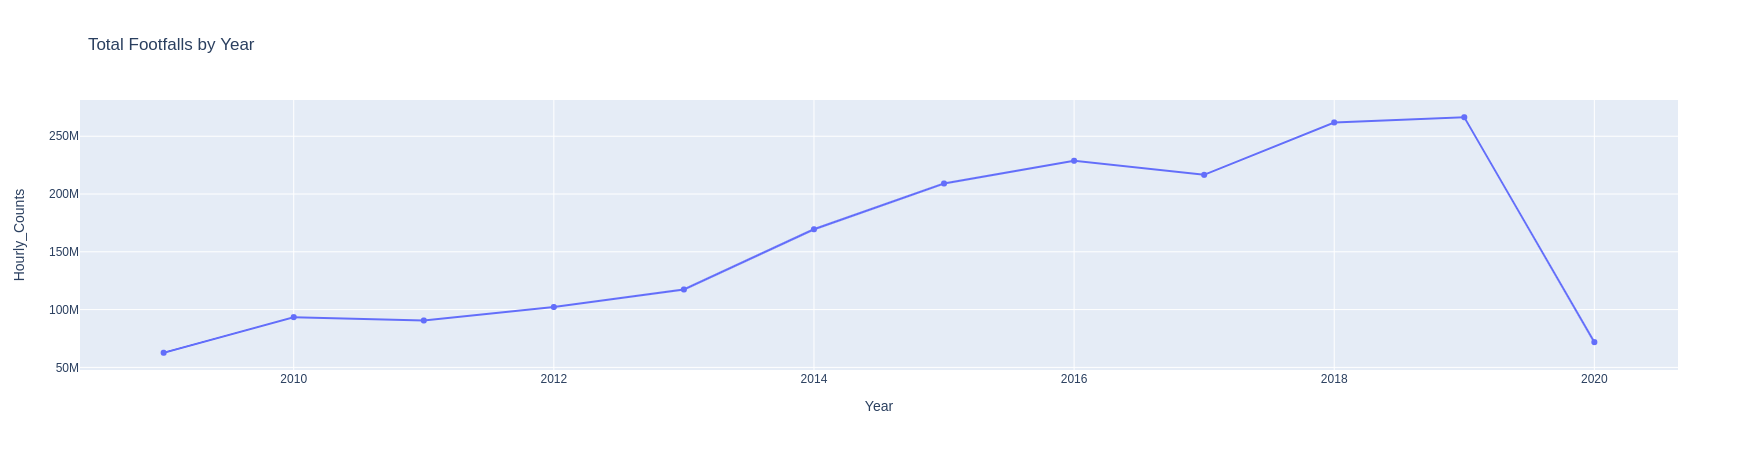

In [5]:
year_counts_df = foot_df.groupby("Year")["Hourly_Counts"].sum().reset_index()
px.line(year_counts_df, x="Year", y="Hourly_Counts", title="Total Footfalls by Year").update_traces(mode='lines+markers')

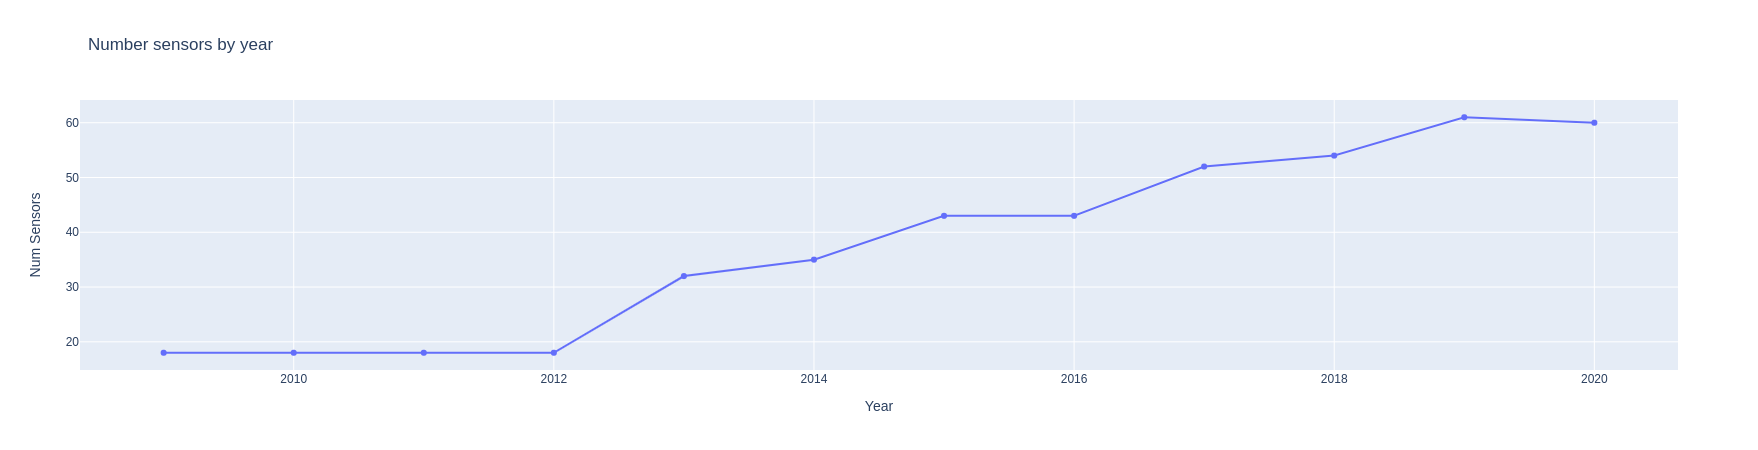

In [6]:
num_sensors_df = foot_df.groupby("Year")["Sensor_Name"].nunique().reset_index(name="Num Sensors")
px.line(num_sensors_df, x="Year", y="Num Sensors", title="Number sensors by year").update_traces(mode='lines+markers')

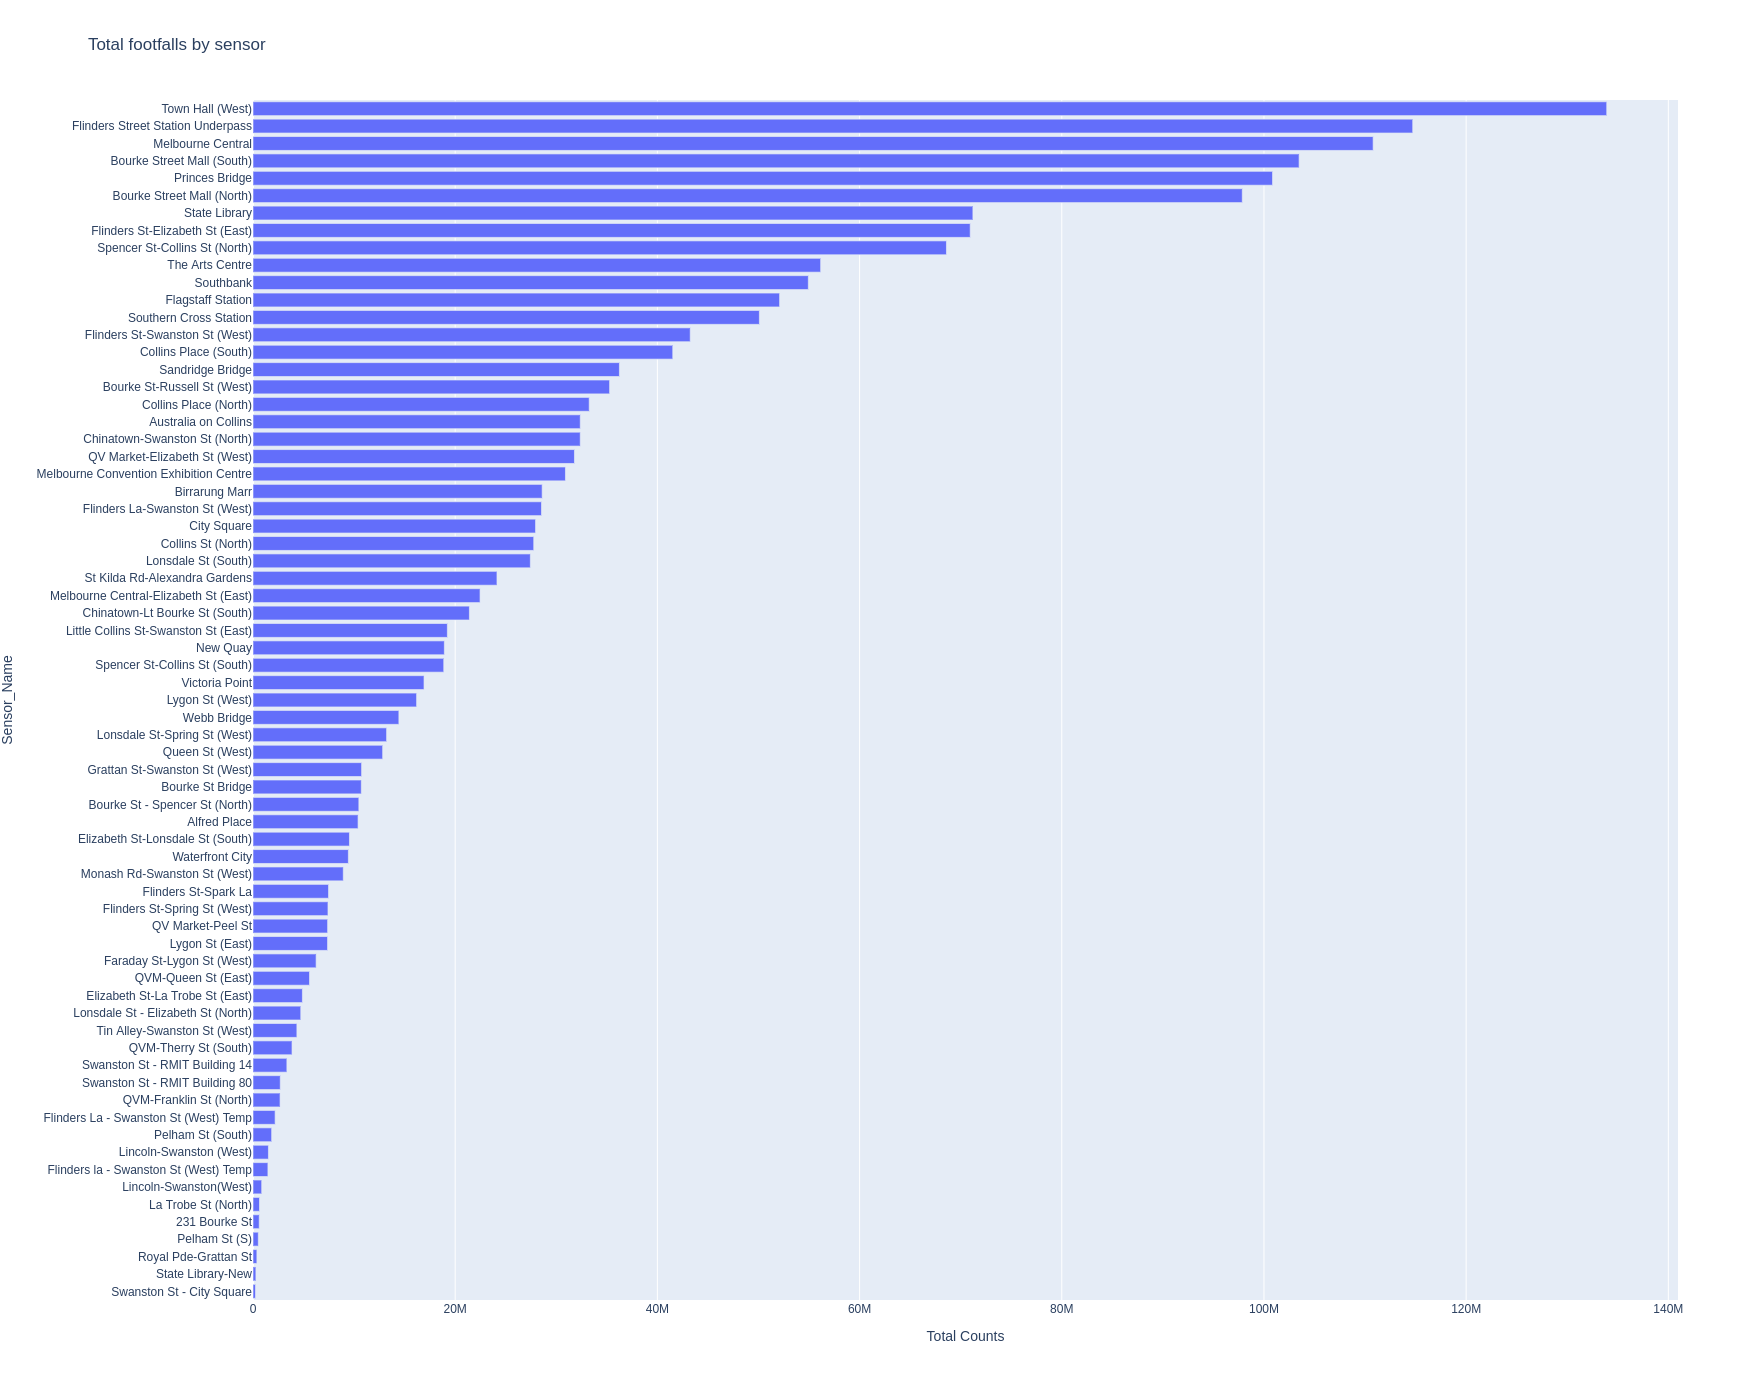

In [7]:
plot_sensor_counts(foot_df)

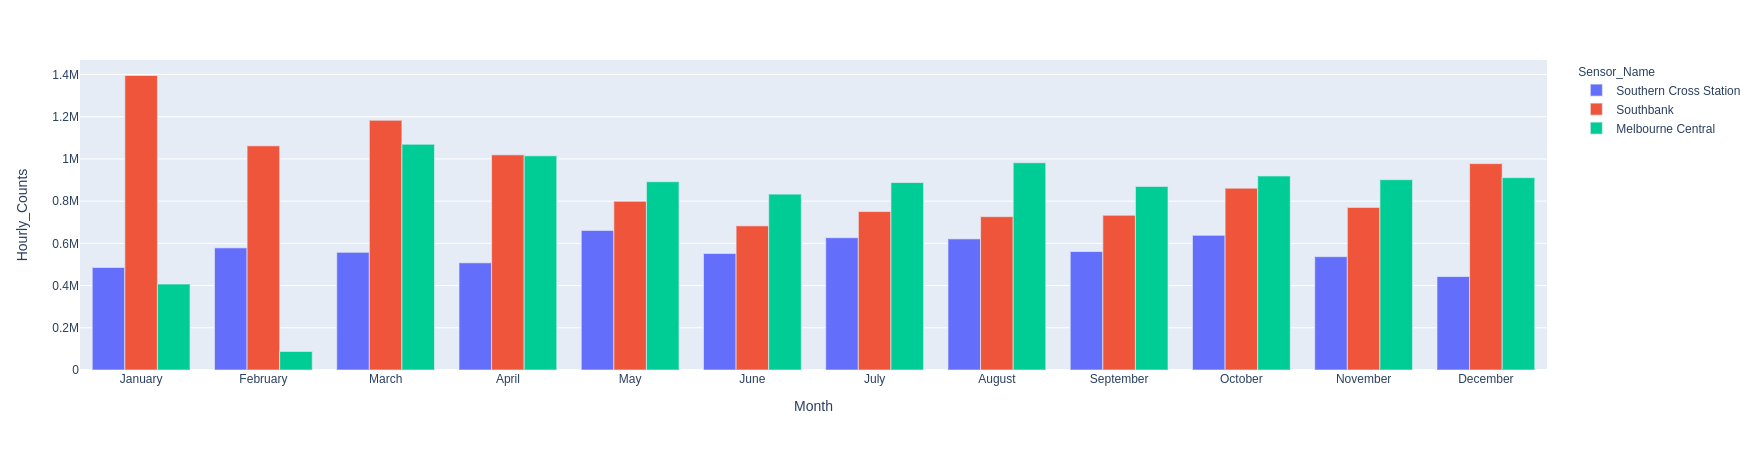

In [8]:
plot_month_counts(
    foot_df,
    year=2019,
    sensor=["Southbank", "Southern Cross Station", "Melbourne Central"],
)

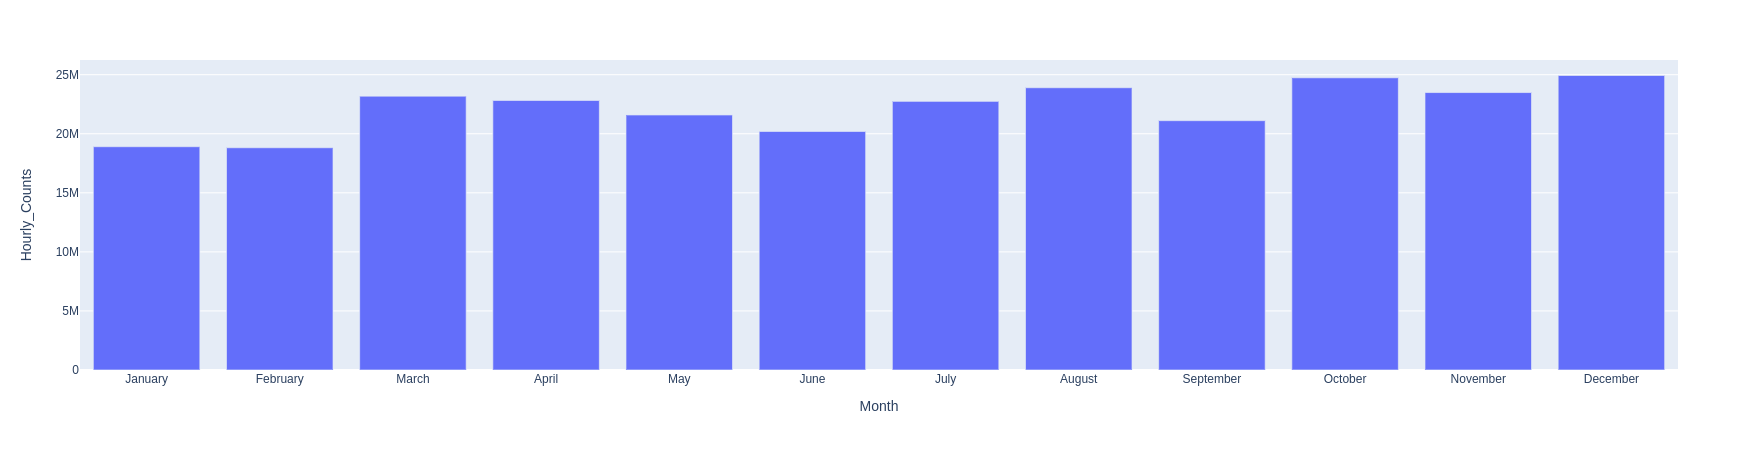

In [9]:
plot_month_counts(foot_df, year=2019)

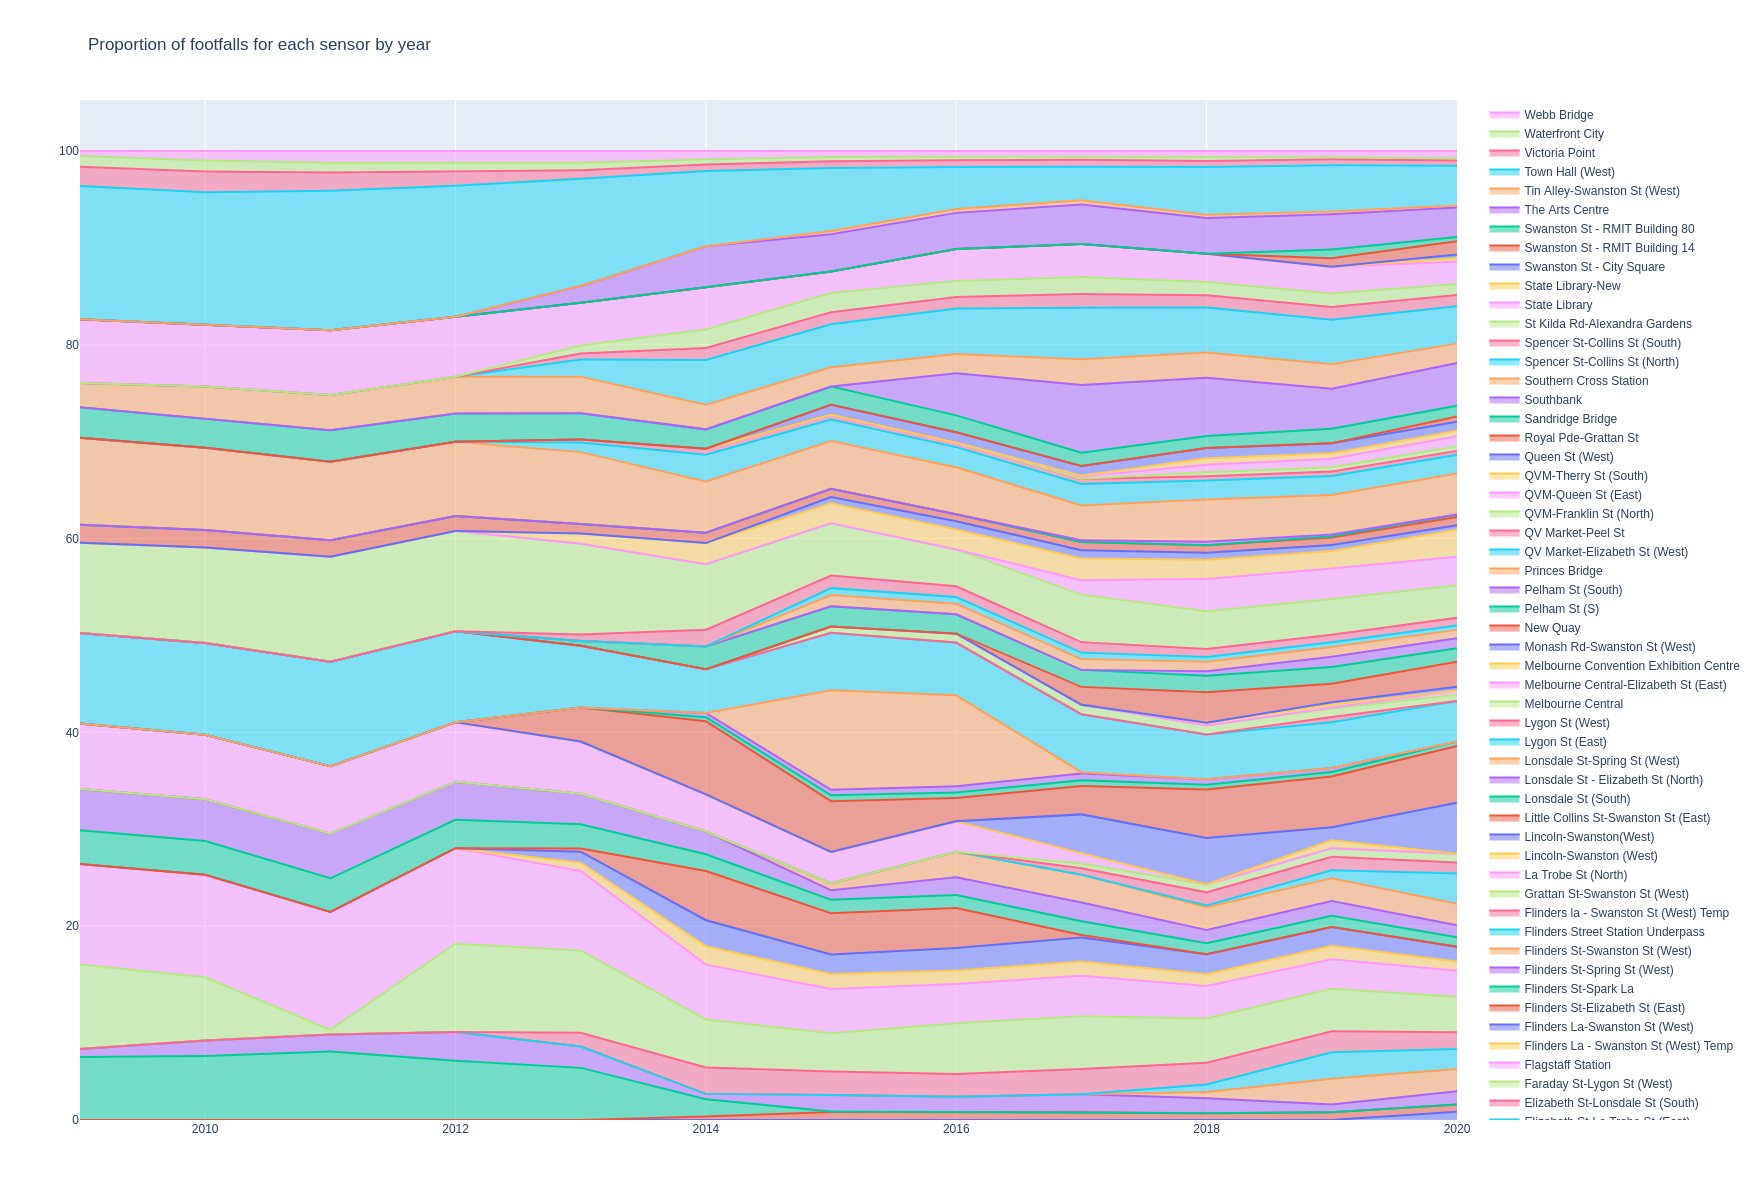

In [10]:
plot_stacked_sensors(foot_df)

## Geocoding



In [11]:
import geocoder
from config import GOOGLE_GEO_KEY, MAPBOX_KEY
geo = geocoder.google('Melbourne, Australia', key=GOOGLE_GEO_KEY)
geo.latlng

[-37.8136276, 144.9630576]

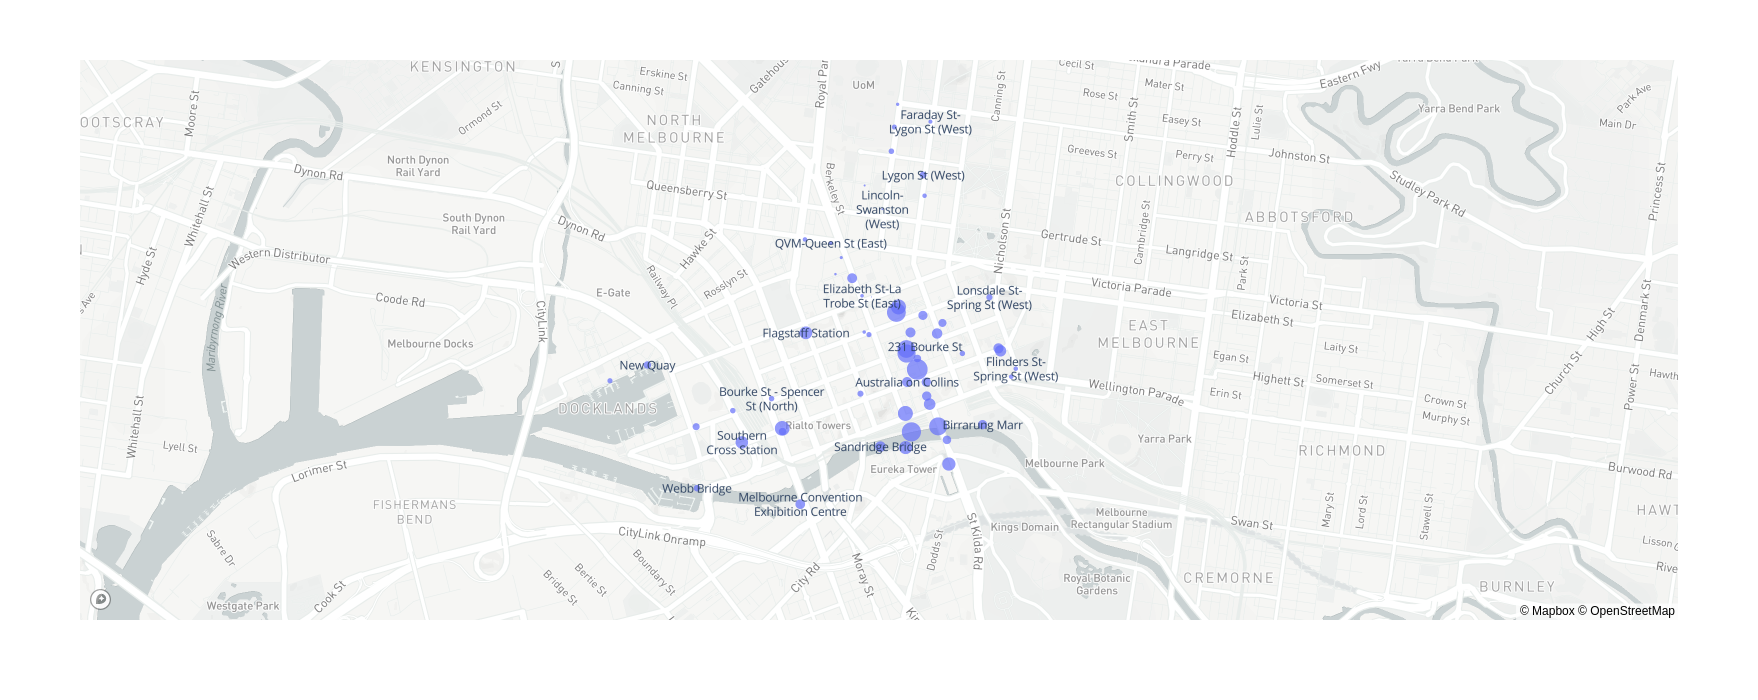

In [58]:
plot_scatter_map(foot_df, height=700, width=700)

In [36]:
foot_df.groupby("Sensor_Name").agg(
        {"Hourly_Counts": sum, "lat": lambda x: x.iloc[0], "long": lambda x: x.iloc[0]}).reset_index()

Sensor_Name  Hourly_Counts        lat        long
0                    231 Bourke St         616350 -37.813408  144.966847
1                     Alfred Place       10394055 -37.814340  144.970194
2             Australia on Collins       32371956 -37.818294  144.956676
3                   Birrarung Marr       28603478 -37.818735  144.974262
4   Bourke St - Spencer St (North)       10472526 -37.817063  144.953291
..                             ...            ...        ...         ...
64    Tin Alley-Swanston St (West)        4342091 -37.796776  144.964627
65                Town Hall (West)      133907326 -37.815081  144.966906
66                  Victoria Point       16917476 -37.818556  144.946919
67                 Waterfront City        9434009 -37.815460  144.939190
68                     Webb Bridge       14430974 -37.823352  144.947305

[69 rows x 4 columns]